# Generating Models
This notebook demonstrates how to generate a model from a compact, string representation of the transcription factors for a gene. We refer to this as a *gene descriptor* or just *descriptor*.

There are 3 variants of descriptors, depending on the number of transcription factors:

- 0 TF: n. Example: "1". This is just the gene number. A "0" is used for INPUT.
- 1 TF: nsm. Example: "1+2". This indicates that P2 activates gene 1. "s" is sign, either "+" or "-".
- 2 TF: nsmisk. Example: "6+7O-1". This means that P7 activates Gene 6 or Gene 1 inhibits Gene 6. The "O" is a non-competitve OR integration term (or "i") and the "1" corresponds to "k" in the specification of this descriptor. Other integration terms are: "A" for AND and "P" for competitive OR integration.

In [1]:
%matplotlib inline
import tellurium as te
import gene_network as gn

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Creating Gene Reactions
This section is intended to give insight into how the code works. It is not essential for using the codes.

Network generation is done by constructing from each gene descriptor a reaction for the mRNA and a set of constants, some of which may need to be initialize.

In [2]:
# Create the reaction (including kinetics) for gene7
gene7 = gn.GeneReaction(7)
print(gene7)

J7: => mRNA7; L7 - d_mRNA7*mRNA7


In [3]:
result = gn.GeneReaction.do("7+4")
result.reaction

'J7: => mRNA7; L7 - d_mRNA7*mRNA7 + Vm7 * ( K1_7*P4^H7 ) / ( 1 + K1_7*P4^H7 )'

In [4]:
result.constants

['L7', 'd_mRNA7', 'K1_7', 'Vm7', 'H7']

In [5]:
result = gn.GeneReaction.do("7+4A-1")
result.reaction

'J7: => mRNA7; L7 - d_mRNA7*mRNA7 + Vm7 * ( K1_7*P4^H7 ) / ( 1 + K1_7*P4^H7 + K2_7*P1^H7 + K3_7*P4^H7*P1^H7 )'

## Creating and Using a Generated Model
Below are examples of running simulations using a network expressed in terms of gene descriptors, and a comparison between the simulation outputs of this representation and the original gene network.

In [7]:
# Some useful functions
def makeDF(data):
    """
    Constructs a pruned data frame consisting only of the mRNA concentrations.
    Time is in the DataFrame index.
    """
    df = pd.DataFrame(data)
    df.columns = [s[1:-1] for s in data.colnames]
    df['time'] = df['im']
    df = df.set_index('time')
    columns = [c for c in df.columns if "mRNA" in c]
    df = df[columns]
    return df
    
def simulateInitialModel():
    """
    Simulates the original model. Returns a dataframe of the result with just mRNA.
    """
    with open("initial-Antimony-model.txt", "r") as fd:
        initial_model = fd.readlines()
    model = "".join(initial_model)
    rr = te.loada(model)
    data = rr.simulate(0, 1200, 120)
    return makeDF(data)

def plotSimulation(df):
    """
    Plots a simulation result contained in a DataFrame.
    """
    plt.plot(df.index, df)
    plt.legend(df_data.columns)

In [22]:
# Description of the initial network.
initial_network = ["1+0O+4", "2+4", "3+6", "4-2", 5, "6+7O-1", 7, "8-1"]
# Construct the network
network = gn.GeneNetwork(initial_network=initial_network)
# Generate the network
network.generate()

In [25]:
# network.generate() sets two properties in network. The first is the Antimony model.
print(network.model)



// Created by libAntimony v3.9.4

model *pathway()



  // Compartments and Species:

  species INPUT, P1, mRNA1, P2, mRNA2, P3, mRNA3, P4, mRNA4, P5, mRNA5, P6;

  species mRNA6, P7, mRNA7, P8, mRNA8;
J1: => mRNA1; L1 - d_mRNA1*mRNA1 + Vm1 * ( K1_1*INPUT^H1+ K2_1*P4^H1+ K3_1*INPUT^H1*P4^H1 ) / ( 1 + K1_1*INPUT^H1 + K2_1*P4^H1 + K3_1*INPUT^H1*P4^H1 )
J2: => mRNA2; L2 - d_mRNA2*mRNA2 + Vm2 * ( K1_2*P4^H2 ) / ( 1 + K1_2*P4^H2 )
J3: => mRNA3; L3 - d_mRNA3*mRNA3 + Vm3 * ( K1_3*P6^H3 ) / ( 1 + K1_3*P6^H3 )
J4: => mRNA4; L4 - d_mRNA4*mRNA4 + Vm4 * ( 1 ) / ( 1 + K1_4*P2^H4 )
J5: => mRNA5; L5 - d_mRNA5*mRNA5
J6: => mRNA6; L6 - d_mRNA6*mRNA6 + Vm6 * ( K1_6*P7^H6 ) / ( 1 + K1_6*P7^H6 + K2_6*P1^H6 + K3_6*P7^H6*P1^H6 )
J7: => mRNA7; L7 - d_mRNA7*mRNA7
J8: => mRNA8; L8 - d_mRNA8*mRNA8 + Vm8 * ( 1 ) / ( 1 + K1_8*P1^H8 )

// Initializations for new constants



  

// Protein Reactions:

  F1:  => P1; a_protein1*mRNA1 - d_protein1*P1;

  F2:  => P2; a_protein2*mRNA2 - d_protein2*P2;

  F3:  => P3; 

In [26]:
# The second is the lmfit.Parameters() needed for parameter optimization
network.parameters

name,value,initial value,min,max,vary
H6,5.00000000,5.0,2.00000000,8.00000000,True
K1_4,0.02000000,0.02,0.01000000,0.03000000,True
K1_1,0.02000000,0.02,0.01000000,0.03000000,True
H4,5.00000000,5.0,2.00000000,8.00000000,True
L5,0.02000000,0.02,0.01000000,0.03000000,True
d_mRNA1,1.25000000,1.25,0.50000000,2.00000000,True
K1_6,0.02000000,0.02,0.01000000,0.03000000,True
L8,0.02000000,0.02,0.01000000,0.03000000,True
d_mRNA3,1.25000000,1.25,0.50000000,2.00000000,True
K1_3,0.02000000,0.02,0.01000000,0.03000000,True


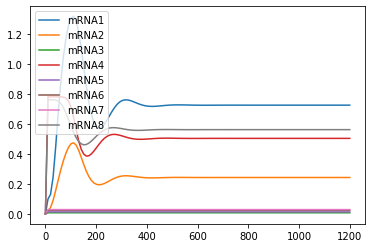

In [23]:
# Here's the result of simulating the generated network
rr = te.loada(base_network.model)
data = rr.simulate(0, 1200, 120)
df_data = makeDF(data)
plotSimulation(df_data)

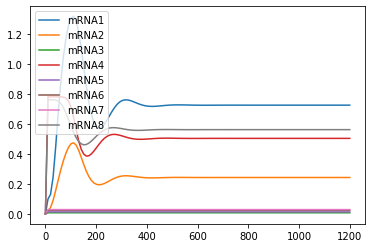

In [24]:
# Compare the above results with the file initial-Antimony-model.txt
df_initial = simulateInitialModel()
plotSimulation(df_initial)

In [19]:
df = df_initial - df_data
df.sum().sum()

4.954803928258755e-14

## Using Generated Networks in Network Discovery